# GROUP-3
#MD Fakrul Islam (613839)
#Adama Daffeh (613827) 
#Raj Kumar Thapa (613819)
#Adane Nigus (112351) 

In [1]:
!pip install split-folders

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import splitfolders

In [4]:
CROP_IMAGE_LOCATION="/content/drive/MyDrive/PlantAI/Potato"
CROP_IMAGE_SPLIT_LOCATION="/content"

In [5]:
splitfolders.ratio(CROP_IMAGE_LOCATION, output=CROP_IMAGE_SPLIT_LOCATION,
    seed=1337, ratio=(.7, .15, .15), group_prefix=None, move=False) # default values

Copying files: 2152 files [00:10, 214.60 files/s]


In [6]:
import os, sys, math
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE 

Tensorflow version 2.8.0


In [7]:
TARGET_SIZE = [150, 150]
CLASSES = [b'EarlyBlight', b'Healthy', b'LateBlight'] # do not change, maps to the labels in the data (folder names)
print(CLASSES)

[b'EarlyBlight', b'Healthy', b'LateBlight']


In [8]:
!pip install scikit-image

In [9]:
from glob import glob  
import os                                                         
import cv2 
import re
from os.path import join
from glob import glob

In [10]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale = 1./255,
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.2,1.2], # brightness
        fill_mode='reflect', cval=125)    #Also try nearest, constant, reflect, wrap

In [11]:
from skimage import io
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/train/"
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='reflect')

VALIDATION_DIR = "/content/val/"
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)
TESTING_DIR = "/content/test/"
testing_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255
	    )

testing_generator = testing_datagen.flow_from_directory(
	TESTING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

Found 1505 images belonging to 3 classes.
Found 321 images belonging to 3 classes.
Found 326 images belonging to 3 classes.


In [12]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
history = model.fit(train_generator, epochs=50, steps_per_epoch=10, validation_data = validation_generator, verbose = 1, validation_steps=10, shuffle=True)

model.save("/content/custom_cnn_potato.h5")

Epoch 1/50
10/10 [==============================] - 11s 661ms/step - loss: 1.1617 - accuracy: 0.3531 - val_loss: 1.0011 - val_accuracy: 0.4469
Epoch 2/50
10/10 [==============================] - 6s 554ms/step - loss: 0.9505 - accuracy: 0.4656 - val_loss: 0.8712 - val_accuracy: 0.4969
Epoch 3/50
10/10 [==============================] - 4s 393ms/step - loss: 1.0678 - accuracy: 0.5281 - val_loss: 0.9608 - val_accuracy: 0.5906
Epoch 4/50
10/10 [==============================] - 3s 343ms/step - loss: 0.8910 - accuracy: 0.5281 - val_loss: 0.8910 - val_accuracy: 0.4875
Epoch 5/50
10/10 [==============================] - 3s 338ms/step - loss: 0.8661 - accuracy: 0.5312 - val_loss: 1.0083 - val_accuracy: 0.4844
Epoch 6/50
10/10 [==============================] - 3s 339ms/step - loss: 0.7872 - accuracy: 0.6125 - val_loss: 0.6458 - val_accuracy: 0.7625
Epoch 7/50
10/10 [==============================] - 4s 393ms/step - loss: 1.1432 - accuracy: 0.6156 - val_loss: 0.6870 - val_accuracy: 0.7063
Epoch

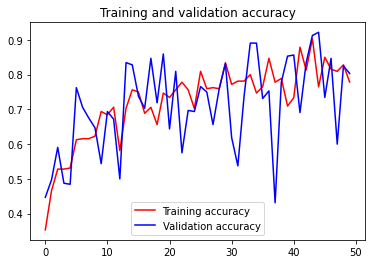

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()